# Scipy.Stats Overview


In [3]:
#import stats module from scipy package
from scipy import stats

# Hypothesis testing with ANOVA

ANOVA is a set of statistical tests for analysing the variation of different groups means. It allows you to determine whether or not the difference between population means are statistically significant.

ANOVA gives an F value which can be interpreted to give a p-value, in general if the p-value is less than 0.05 then we can reject the null hypothesis that there is no difference in means.

## Prerequisite Assumptions
Before performing ANOVA, you should first check the following 6 assumptions are true, if any of your assumptions are not correct this casts doubt on whether ANOVA is a suitable test for your data.
***
1) Your dependent variable (y variable) should be a continuous variable.
2) Your independent variable (X variable) should be a categorical variable and it should be made up of 2 or more groups (though if it's just 2 groups t-test is probably more appropriate)
3) Observations should be independent, that is to say, if asking people for their favourite movie you wouldn't ask the same person twice.
4) There should be no significant outliers.
5) The dependent variable should be normally distributed across it's independent variable groups.
6) The variance should be homogenous across each independent variable group.
***

For these assumptions, the first 3 can all be determined without doing any statistical tests, points 1 and 2 should be clear from looking at the data. As for point 3 on the observatiovs being independent, this is something you can't really confirm for yourself and when using data available online (suchas used in this notebook), but this is something you can control when collecting the data yourself.

The rest of the assumptions can each be determined statistically.

For determining outliers we can make use of box plot's to see if we have any points that fall outside of 
$ Q1 - IQR*1.5 $ and $ Q3 - IQR*1.5 $.
As another way of spotting outliers we can also use a z-score outside of the range of -3 to +3 to identify outliers.

Whether the dependent variable is normally distributed across its categories can be found using the Shapiro-Wilks test of normality.

Variance Homogeneity can be determined using Levene's test.
***

Before actually performing the ANOVA test below, will first check that each of the assumptions outlined above are not violated

In [88]:
#Todo add code for testing assumptions on some test dataset
from sklearn import datasets

iris_ds = datasets.load_iris(as_frame=True) #get the iris dataset, bring in with dataframe also
iris_independent_df = iris_ds.data #get dataframe from iris_ds
iris_dependent_df = iris_ds.target
independent_variable = 'petal length (cm)'

In [89]:
#Assumption 1 and Assumption 2

print(f"For this ANOVA test I'd like to pick 'petal length(cm)' to be the independent variable, a quick check of this column using pandas describe() function confirms assumption 1")
print(f"\n{iris_independent_df[independent_variable].describe()}")

print(f"\nThe following are our dependent variables groups/categories (these are represented as 0, 1 and 2 in iris_dependent_df) - {iris_ds.target_names}")
print("This confirms assumption 2 as we have a categorical variable with 3 groups")

For this ANOVA test I'd like to pick 'petal length(cm)' to be the independent variable, a quick check of this column using pandas describe() function confirms assumption 1

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal length (cm), dtype: float64

The following are our dependent variables groups/categories (these are represented as 0, 1 and 2 in iris_dependent_df) - ['setosa' 'versicolor' 'virginica']
This confirms assumption 2 as we have a categorical variable with 3 groups


### Assumption 4 - No significant outliers

c:\users\itske\desktop\education\gmit modules\machine learning and statistics 52954\machine-learning-and-statistics-assessment\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Checking for independent variable outliers'}, xlabel='petal length (cm)'>

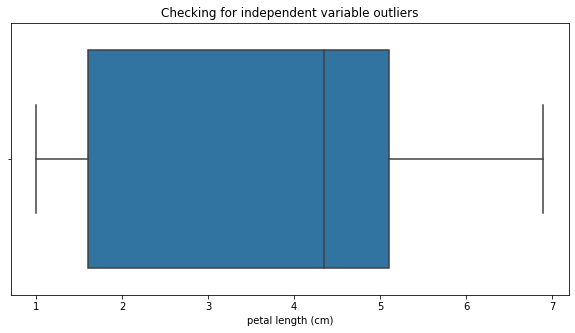

In [90]:
#Assumption 4 - No significant outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5)) #set figure size
plt.title("Checking for independent variable outliers")
sns.boxplot(iris_independent_df[independent_variable]) #boxplot of independent variable


Boxplot doesn't show there as being any outliers, but to play it safe let's check with z-score also. To get the z-score will make use of the scipy [zscore function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)./

In [91]:
import numpy as np
z = stats.zscore(iris_independent_df[independent_variable]) #get z score for each value in our independent variable
z_abs = np.abs(z) #get absolute value so we only need to check if z score is greater than 3

#Loop through z_abs, print the z-score and row it occurred on if > 3, if outliers are encountered we at least know where they occur
for row, value in enumerate(z_abs):
    if value > 3:
        print(f"Outlier detected with z-score: {value}\n Detected at row: {row}")

We've confirmed there are no significant outliers, next will check whether assumption 5 is violated.

### Assumption 5 - Dependent Variable normally distributed across categories

To determine if the dependent variable is normally distributed, scipy-stats [shapiro function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) is used, the returned p-value then tells us whether it is distributed normally.

The null hypothesis for the Shapiro-Wilks is that a variable is normally distributed, so at values < 0.05 we reject the null hypothesis.

In [95]:
setosa_statistic, setosa_p_val = stats.shapiro(iris_independent_df[iris_dependent_df==0][independent_variable] )
versicolor_statistic, versicolor_p_val = stats.shapiro(iris_independent_df[iris_dependent_df==1][independent_variable] )
virginica_statistic, virginica_p_val = stats.shapiro(iris_independent_df[iris_dependent_df==2][independent_variable] )

print(f"Shapiro-Wilks P-value for setosa (which just at the borderline for rejecting < 0.05) - {setosa_p_val}")
print(f"Shapiro-Wilks P-value for versicolor - {versicolor_p_val}")
print(f"Shapiro-Wilks P-value for virginica - {virginica_p_val}")

Shapiro-Wilks P-value for setosa (which just at the borderline for rejecting < 0.05) - 0.05481043830513954
Shapiro-Wilks P-value for versicolor - 0.1584833413362503
Shapiro-Wilks P-value for virginica - 0.10977369546890259


Confirming each of our assumptions so far, leaves us with the final assumption to check.

### Assumption 6 - Variance Homogeneity

For determining whether the variance is homogenous e.g. that the variance is equal across groups, we use the p-value from the [levene function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) in scipy-stats.

The null hypothesis for the levene function is that the variance is equal, so if our p-value is < 0.05 we reject this hypothesis as our variance lacks homogeneity.

In [96]:
stats.levene(
    iris_independent_df[iris_dependent_df==0][independent_variable],
    iris_independent_df[iris_dependent_df==1][independent_variable],
    iris_independent_df[iris_dependent_df==2][independent_variable]
)

LeveneResult(statistic=19.480338801923573, pvalue=3.1287566394085344e-08)

Unfortunately in this case we failed the last assumption as our pvalue is too low.

Regardless for now let's perform ANOVA on this...

If the returned p-value is less than 0.05, then we can reject the null hypothesis. 
The null hypothesis for ANOVA is that there is no difference between the means across the groups 

In [97]:
stats.f_oneway(
    iris_independent_df[iris_dependent_df==0][independent_variable],
    iris_independent_df[iris_dependent_df==1][independent_variable],
    iris_independent_df[iris_dependent_df==2][independent_variable]
)

F_onewayResult(statistic=1180.161182252981, pvalue=2.8567766109615584e-91)

### TODO - Add Post Hoc test for ANOVA